In [614]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [615]:
# Importing required Libs

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels
import statsmodels.api as sm
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from sklearn.metrics import r2_score

In [616]:
# Reading Data from day.csv file
day_df = pd.read_csv(r'C:\Users\ashwini.patil09\Downloads\day.csv')

In [617]:
#check data, shape etc
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [618]:
day_df.shape

(730, 16)

In [619]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [620]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [621]:
# verify if no null values as per output of info statement
day_df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [622]:
# delete duplicates and create a new dataframe to store unique records
unique_day_df=day_df.drop_duplicates()

In [623]:
unique_day_df.shape

(730, 16)

#shape is same as first dataframe which means the dataset didnt have any duplicate values

In [624]:
# dropping columns that wont arent categorical
# looking at data dictionary and actual data, it is clear that we can drop index, casual and registered as they are counts which we want to predict

unique_day_df.drop(['dteday','instant','casual','registered'],axis=1,inplace=True)

In [625]:
unique_day_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [626]:
# Converting numeric column data to text so they can be treated as categorical columns
# convert season
unique_day_df.season = df.season.map({1:'Spring', 2:'Summer', 3:'Fall', 4:'Winter'})

In [627]:
unique_day_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,Spring,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,Spring,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,Spring,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,Spring,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,Spring,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [628]:
# convert month
unique_day_df.mnth = df.mnth.map({1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'June',7:'July',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'})

In [629]:
unique_day_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,Spring,0,Jan,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,Spring,0,Jan,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,Spring,0,Jan,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,Spring,0,Jan,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,Spring,0,Jan,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [630]:
# Convert Holiday
unique_day_df.holiday = df.holiday.map({0:'Holiday',1:'NoHoliday'})

In [631]:
unique_day_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,Spring,0,Jan,Holiday,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,Spring,0,Jan,Holiday,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,Spring,0,Jan,Holiday,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,Spring,0,Jan,Holiday,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,Spring,0,Jan,Holiday,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [632]:
# convert weekday
unique_day_df.weekday = df.weekday.map({0:'Sun',1:'Mon',2:'Tue',3:'Wed',4:'Thur',5:'Fri',6:'Sat'})

In [633]:
unique_day_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,Spring,0,Jan,Holiday,Sat,0,2,14.110847,18.18125,80.5833,10.749882,985
1,Spring,0,Jan,Holiday,Sun,0,2,14.902598,17.68695,69.6087,16.652113,801
2,Spring,0,Jan,Holiday,Mon,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,Spring,0,Jan,Holiday,Tue,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,Spring,0,Jan,Holiday,Wed,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [634]:
# convert weatherlist
unique_day_df.weathersit = df.weathersit.map({1:'Clear',2:'Misty',3:'Light_snowrain',4:'Heavy_snowrain'})

In [635]:
unique_day_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,Spring,0,Jan,Holiday,Sat,0,Misty,14.110847,18.18125,80.5833,10.749882,985
1,Spring,0,Jan,Holiday,Sun,0,Misty,14.902598,17.68695,69.6087,16.652113,801
2,Spring,0,Jan,Holiday,Mon,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,Spring,0,Jan,Holiday,Tue,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,Spring,0,Jan,Holiday,Wed,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


In [636]:
# convert workingday
unique_day_df.workingday=df.workingday.map({0:'WorkingDay',1:'NonWorkingDay'})

In [637]:
unique_day_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,Spring,0,Jan,Holiday,Sat,WorkingDay,Misty,14.110847,18.18125,80.5833,10.749882,985
1,Spring,0,Jan,Holiday,Sun,WorkingDay,Misty,14.902598,17.68695,69.6087,16.652113,801
2,Spring,0,Jan,Holiday,Mon,NonWorkingDay,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,Spring,0,Jan,Holiday,Tue,NonWorkingDay,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,Spring,0,Jan,Holiday,Wed,NonWorkingDay,Clear,9.305237,11.46350,43.6957,12.522300,1600


###Visualize Data

### Visualize Data

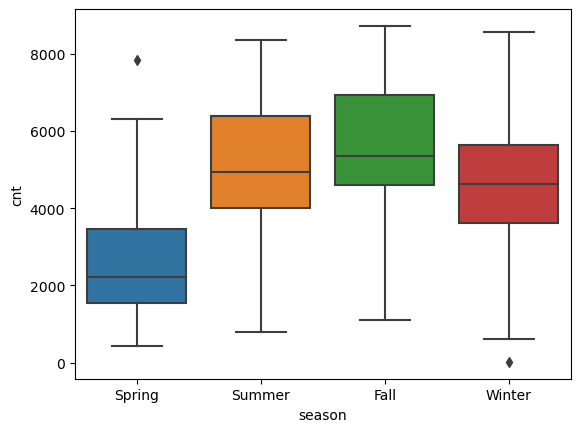

In [638]:
sns.boxplot(x = 'season', y = 'cnt', data = unique_day_df)
plt.show()

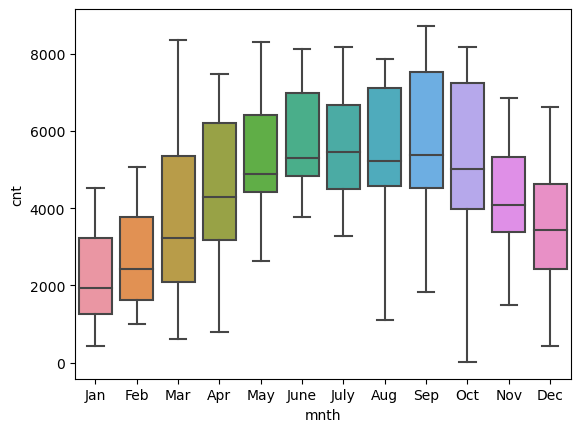

In [639]:
sns.boxplot(x = 'mnth', y = 'cnt', data = unique_day_df)
plt.show()

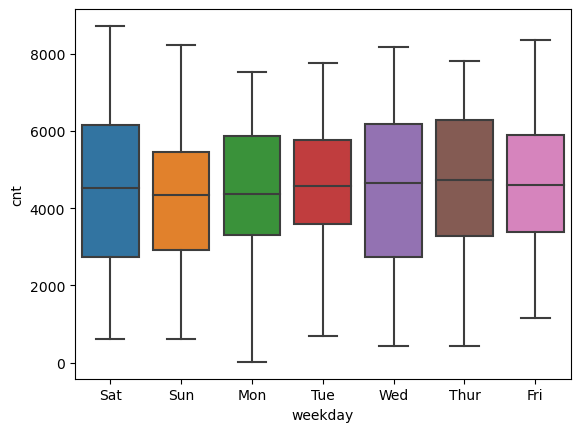

In [640]:
sns.boxplot(x = 'weekday', y = 'cnt', data = unique_day_df)
plt.show()

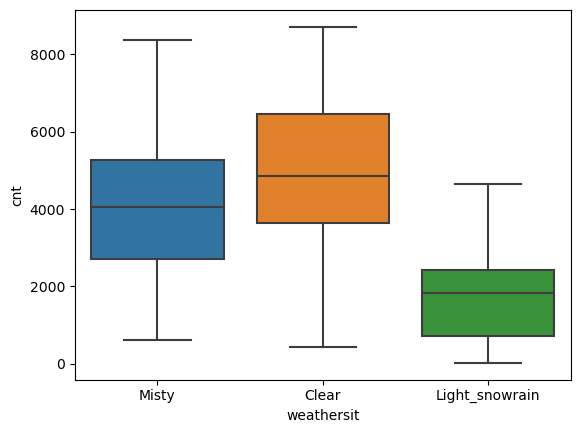

In [641]:
sns.boxplot(x = 'weathersit', y = 'cnt', data = unique_day_df)
plt.show()

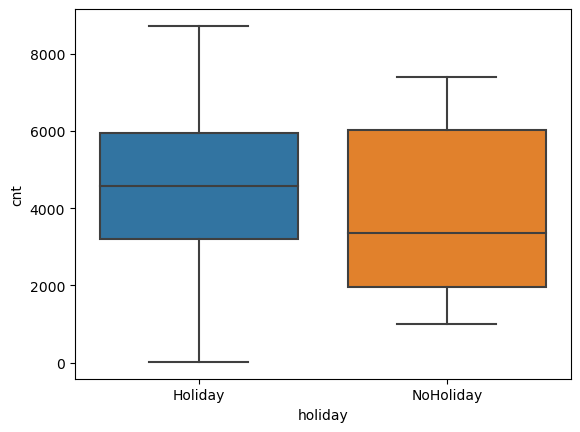

In [642]:
sns.boxplot(x = 'holiday', y = 'cnt', data = unique_day_df)
plt.show()

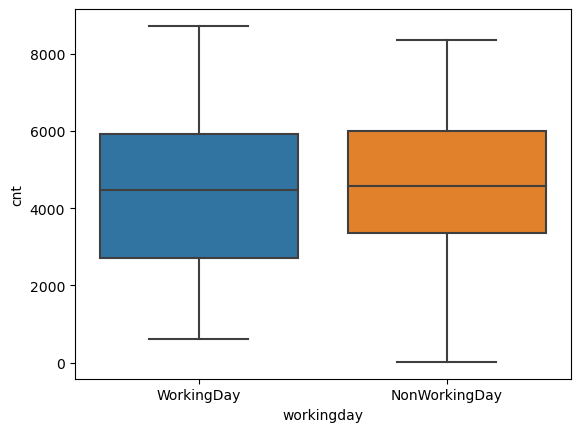

In [643]:
sns.boxplot(x = 'workingday', y = 'cnt', data = unique_day_df)
plt.show()

<AxesSubplot:xlabel='season', ylabel='cnt'>

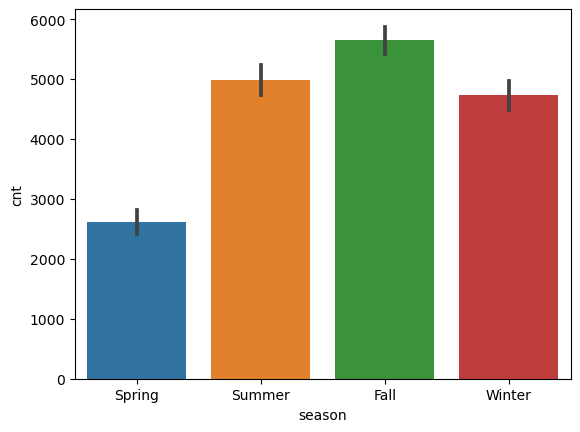

In [644]:
# Season is clearly a categorical variable. Lets check in bar chart
sns.barplot('season','cnt',data=unique_day_df)

<AxesSubplot:xlabel='season', ylabel='cnt'>

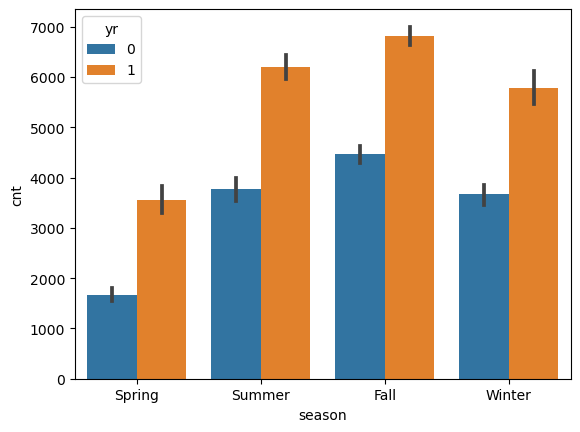

In [645]:
#lets see what data tells when we stack with year
sns.barplot('season','cnt',data=unique_day_df, hue='yr')

 Here 0 means previous year and 1 means current year

<AxesSubplot:xlabel='mnth', ylabel='cnt'>

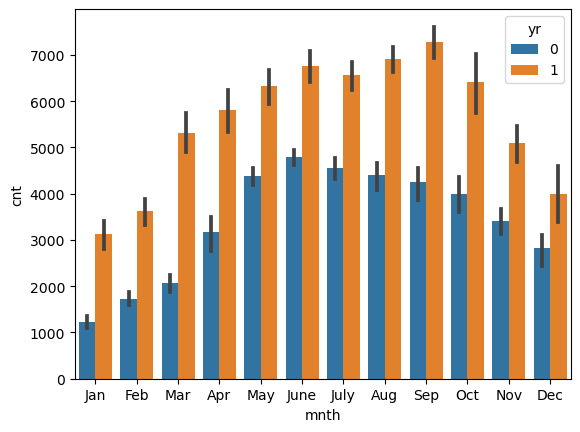

In [646]:
# Now lets break down the counts by month of year
sns.barplot('mnth','cnt',data=unique_day_df, hue='yr')

#Clearly counts are more in current year which means usage of bikes is more in current year

#more bookings are done in mid year i.e. Apr to Oct

<AxesSubplot:xlabel='weathersit', ylabel='cnt'>

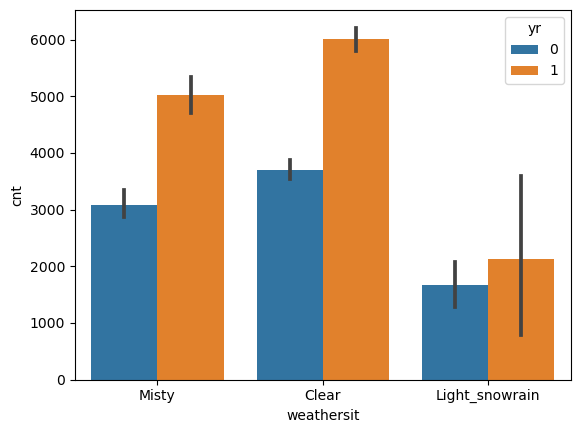

In [647]:
# Now lets see the data as per weathersit
sns.barplot('weathersit','cnt',data=unique_day_df, hue='yr')

#More usage of bikes in Misty or Clear weathers

<AxesSubplot:xlabel='weekday', ylabel='cnt'>

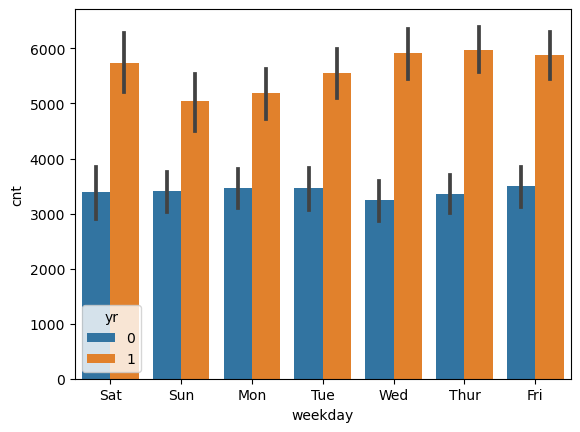

In [648]:
# counts by weekday
sns.barplot('weekday','cnt',data=unique_day_df, hue='yr')

#Wed, Thurs, Fri and Sat have more bookings

<AxesSubplot:xlabel='holiday', ylabel='cnt'>

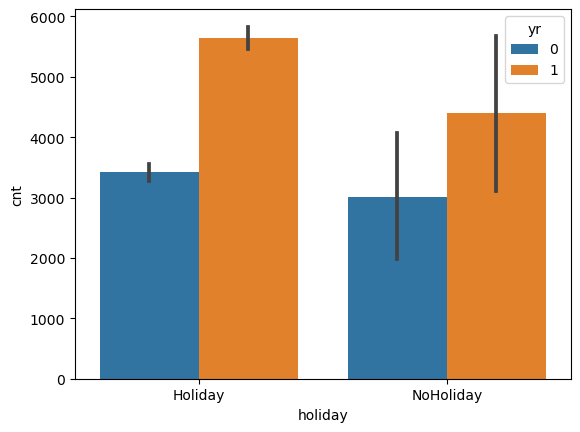

In [649]:
# counts by Holiday
sns.barplot('holiday','cnt',data=unique_day_df, hue='yr')

#More bookings on holday

<AxesSubplot:xlabel='workingday', ylabel='cnt'>

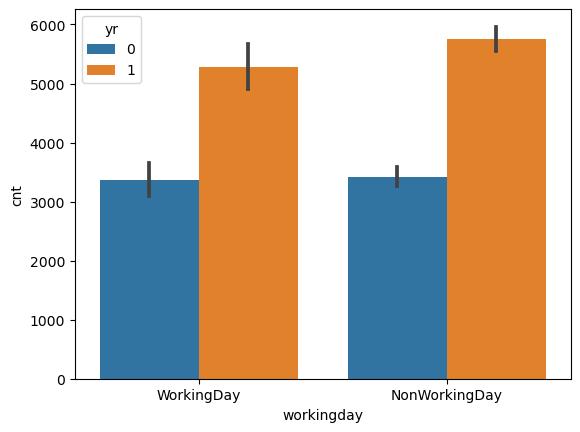

In [650]:
#Counts by workignday
sns.barplot('workingday','cnt',data=unique_day_df, hue='yr')

#Same for both years on working and non working day

<AxesSubplot:xlabel='yr', ylabel='cnt'>

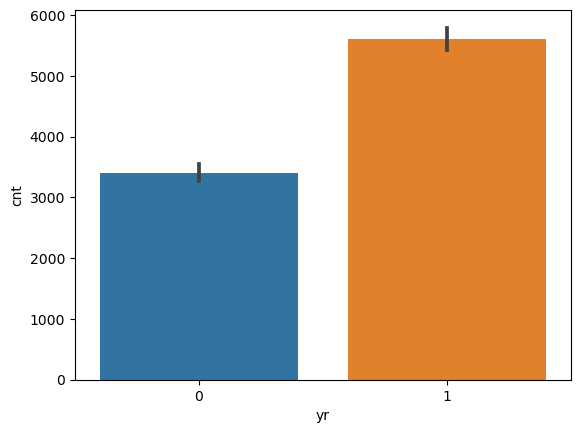

In [651]:
# counts by year
sns.barplot('yr','cnt',data=unique_day_df)

#clearly there is increase in usage in current year

### visualizing the numerical columns i.e. temp, atemp, humidity, windspeed and cnt

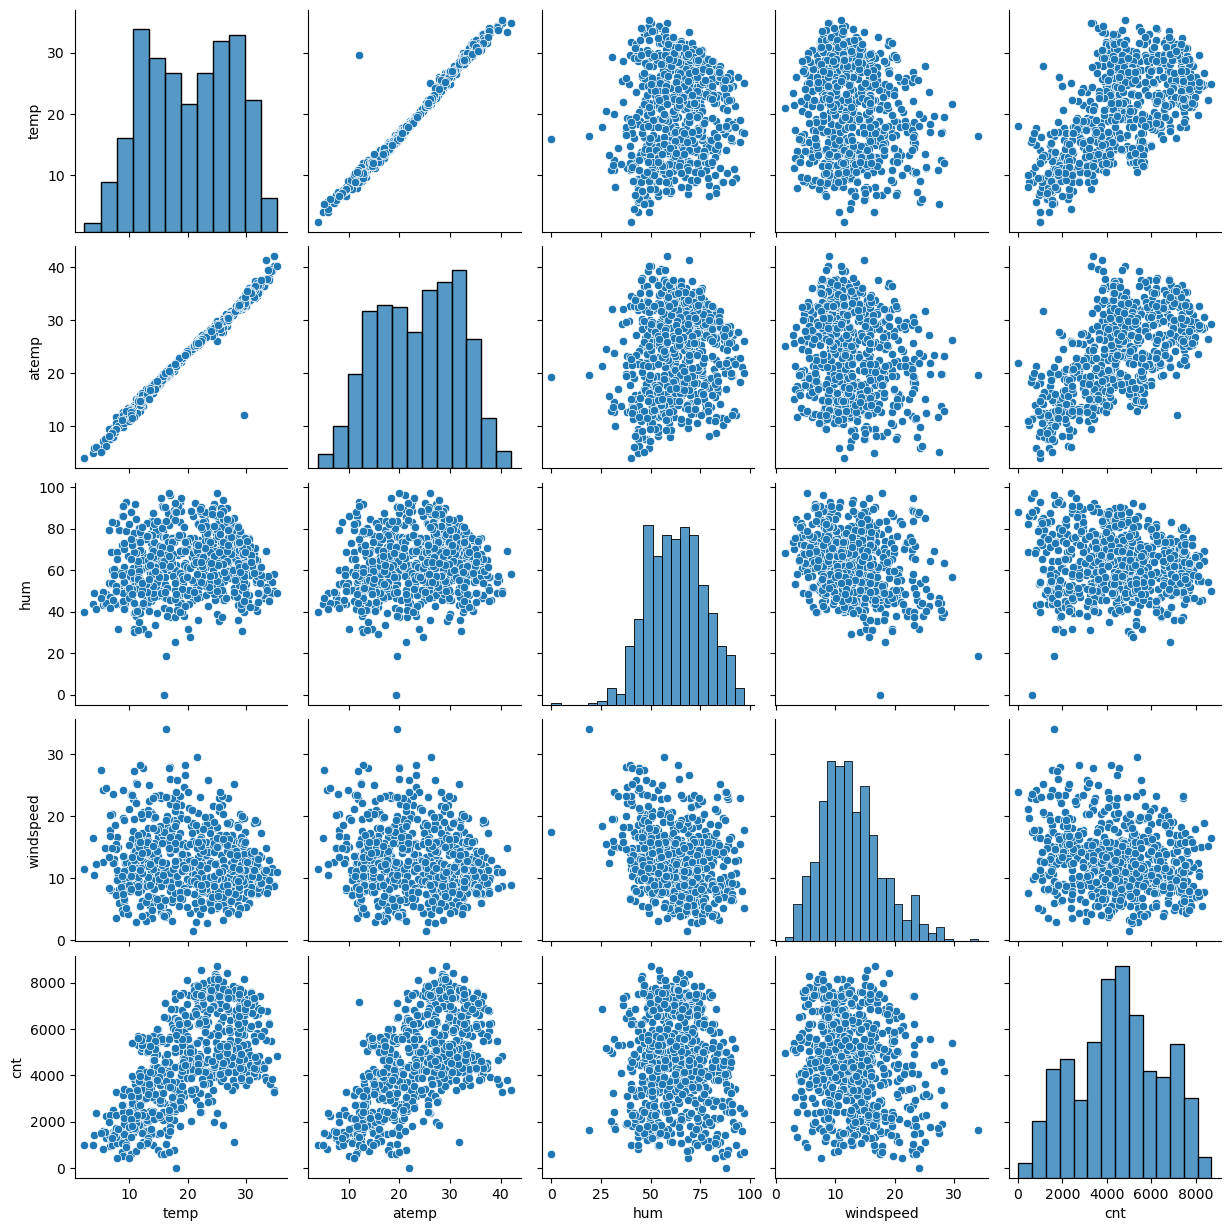

In [652]:
sns.pairplot(data=df,vars=['temp','atemp','hum','windspeed','cnt'])
plt.show()

#temp and atemp seem to have linear relationship. Lets verify by plotting a heatmap to see the correlation

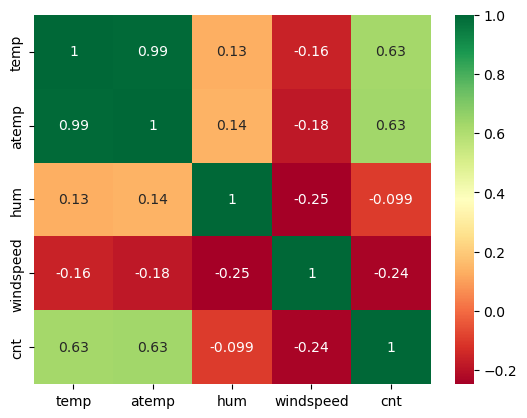

In [653]:
sns.heatmap(df[['temp','atemp','hum','windspeed','cnt']].corr(), annot = True, cmap="RdYlGn")
plt.show()

#the correlation between temp/cnt and atemp/cnt is high. So our assumption above is correct.

### Data Prep for Model

In [654]:
#lets check the data once again before proceding with model
unique_day_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,Spring,0,Jan,Holiday,Sat,WorkingDay,Misty,14.110847,18.18125,80.5833,10.749882,985
1,Spring,0,Jan,Holiday,Sun,WorkingDay,Misty,14.902598,17.68695,69.6087,16.652113,801
2,Spring,0,Jan,Holiday,Mon,NonWorkingDay,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,Spring,0,Jan,Holiday,Tue,NonWorkingDay,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,Spring,0,Jan,Holiday,Wed,NonWorkingDay,Clear,9.305237,11.46350,43.6957,12.522300,1600


In [655]:
# Creating Dummy variable for month, weekday, weathersit and season so as to convert them to integers

months_df=pd.get_dummies(df.mnth.map({1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'June',7:'July',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'}),drop_first=True)
weekdays_df=pd.get_dummies(df.weekday.map({0:'Sun',1:'Mon',2:'Tue',3:'Wed',4:'Thur',5:'Fri',6:'Sat'}),drop_first=True)
weathersit_df=pd.get_dummies(df.weathersit.map({1:'Clear',2:'Misty',3:'Light_snowrain',4:'Heavy_snowrain'}),drop_first=True)
seasons_df=pd.get_dummies(df.season.map({1:'Spring', 2:'Summer', 3:'Fall', 4:'Winter'}),drop_first=True)

In [656]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [657]:
#merge with dummy
df_new = pd.concat([unique_day_df,months_df,weekdays_df,weathersit_df,seasons_df],axis=1)
df_new.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,...,Sat,Sun,Thur,Tue,Wed,Light_snowrain,Misty,Spring,Summer,Winter
0,Spring,0,Jan,Holiday,Sat,WorkingDay,Misty,14.110847,18.18125,80.5833,...,1,0,0,0,0,0,1,1,0,0
1,Spring,0,Jan,Holiday,Sun,WorkingDay,Misty,14.902598,17.68695,69.6087,...,0,1,0,0,0,0,1,1,0,0
2,Spring,0,Jan,Holiday,Mon,NonWorkingDay,Clear,8.050924,9.47025,43.7273,...,0,0,0,0,0,0,0,1,0,0
3,Spring,0,Jan,Holiday,Tue,NonWorkingDay,Clear,8.200000,10.60610,59.0435,...,0,0,0,1,0,0,0,1,0,0
4,Spring,0,Jan,Holiday,Wed,NonWorkingDay,Clear,9.305237,11.46350,43.6957,...,0,0,0,0,1,0,0,1,0,0


In [658]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 0 to 729
Data columns (total 34 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   season          730 non-null    object 
 1   yr              730 non-null    int64  
 2   mnth            730 non-null    object 
 3   holiday         730 non-null    object 
 4   weekday         730 non-null    object 
 5   workingday      730 non-null    object 
 6   weathersit      730 non-null    object 
 7   temp            730 non-null    float64
 8   atemp           730 non-null    float64
 9   hum             730 non-null    float64
 10  windspeed       730 non-null    float64
 11  cnt             730 non-null    int64  
 12  Aug             730 non-null    uint8  
 13  Dec             730 non-null    uint8  
 14  Feb             730 non-null    uint8  
 15  Jan             730 non-null    uint8  
 16  July            730 non-null    uint8  
 17  June            730 non-null    uin

In [659]:
# dropping unnecessary columns as we have already created dummy variable out of it.
df_new.drop(['season','mnth','weekday','weathersit'], axis = 1, inplace = True)

In [660]:
df_new.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,Aug,Dec,...,Sat,Sun,Thur,Tue,Wed,Light_snowrain,Misty,Spring,Summer,Winter
0,0,Holiday,WorkingDay,14.110847,18.18125,80.5833,10.749882,985,0,0,...,1,0,0,0,0,0,1,1,0,0
1,0,Holiday,WorkingDay,14.902598,17.68695,69.6087,16.652113,801,0,0,...,0,1,0,0,0,0,1,1,0,0
2,0,Holiday,NonWorkingDay,8.050924,9.47025,43.7273,16.636703,1349,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,Holiday,NonWorkingDay,8.200000,10.60610,59.0435,10.739832,1562,0,0,...,0,0,0,1,0,0,0,1,0,0
4,0,Holiday,NonWorkingDay,9.305237,11.46350,43.6957,12.522300,1600,0,0,...,0,0,0,0,1,0,0,1,0,0


In [661]:
df_new.shape

(730, 30)

In [662]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   yr              730 non-null    int64  
 1   holiday         730 non-null    object 
 2   workingday      730 non-null    object 
 3   temp            730 non-null    float64
 4   atemp           730 non-null    float64
 5   hum             730 non-null    float64
 6   windspeed       730 non-null    float64
 7   cnt             730 non-null    int64  
 8   Aug             730 non-null    uint8  
 9   Dec             730 non-null    uint8  
 10  Feb             730 non-null    uint8  
 11  Jan             730 non-null    uint8  
 12  July            730 non-null    uint8  
 13  June            730 non-null    uint8  
 14  Mar             730 non-null    uint8  
 15  May             730 non-null    uint8  
 16  Nov             730 non-null    uint8  
 17  Oct             730 non-null    uin

In [663]:
df_new.drop(['holiday','workingday'], axis = 1, inplace = True)
df_new.head()

,yr,temp,atemp,hum,windspeed,cnt,Aug,Dec,Feb,Jan,...,Sat,Sun,Thur,Tue,Wed,Light_snowrain,Misty,Spring,Summer,Winter
0,0,14.110847,18.18125,80.5833,10.749882,985,0,0,0,1,...,1,0,0,0,0,0,1,1,0,0
1,0,14.902598,17.68695,69.6087,16.652113,801,0,0,0,1,...,0,1,0,0,0,0,1,1,0,0
2,0,8.050924,9.47025,43.7273,16.636703,1349,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
3,0,8.200000,10.60610,59.0435,10.739832,1562,0,0,0,1,...,0,0,0,1,0,0,0,1,0,0
4,0,9.305237,11.46350,43.6957,12.522300,1600,0,0,0,1,...,0,0,0,0,1,0,0,1,0,0


### Creating training and test data sets

In [664]:
# splitting dataframe to train and test sets
df_train, df_test = train_test_split(df_new, train_size = 0.7, random_state = 100)

In [665]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 510 entries, 576 to 520
Data columns (total 28 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   yr              510 non-null    int64  
 1   temp            510 non-null    float64
 2   atemp           510 non-null    float64
 3   hum             510 non-null    float64
 4   windspeed       510 non-null    float64
 5   cnt             510 non-null    int64  
 6   Aug             510 non-null    uint8  
 7   Dec             510 non-null    uint8  
 8   Feb             510 non-null    uint8  
 9   Jan             510 non-null    uint8  
 10  July            510 non-null    uint8  
 11  June            510 non-null    uint8  
 12  Mar             510 non-null    uint8  
 13  May             510 non-null    uint8  
 14  Nov             510 non-null    uint8  
 15  Oct             510 non-null    uint8  
 16  Sep             510 non-null    uint8  
 17  Mon             510 non-null    u

In [666]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 220 entries, 184 to 653
Data columns (total 28 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   yr              220 non-null    int64  
 1   temp            220 non-null    float64
 2   atemp           220 non-null    float64
 3   hum             220 non-null    float64
 4   windspeed       220 non-null    float64
 5   cnt             220 non-null    int64  
 6   Aug             220 non-null    uint8  
 7   Dec             220 non-null    uint8  
 8   Feb             220 non-null    uint8  
 9   Jan             220 non-null    uint8  
 10  July            220 non-null    uint8  
 11  June            220 non-null    uint8  
 12  Mar             220 non-null    uint8  
 13  May             220 non-null    uint8  
 14  Nov             220 non-null    uint8  
 15  Oct             220 non-null    uint8  
 16  Sep             220 non-null    uint8  
 17  Mon             220 non-null    u

In [667]:
# lets convert both datasets to same data types
convert_dict = {'cnt': float }
 
df_test = df_test.astype(convert_dict)
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 220 entries, 184 to 653
Data columns (total 28 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   yr              220 non-null    int64  
 1   temp            220 non-null    float64
 2   atemp           220 non-null    float64
 3   hum             220 non-null    float64
 4   windspeed       220 non-null    float64
 5   cnt             220 non-null    float64
 6   Aug             220 non-null    uint8  
 7   Dec             220 non-null    uint8  
 8   Feb             220 non-null    uint8  
 9   Jan             220 non-null    uint8  
 10  July            220 non-null    uint8  
 11  June            220 non-null    uint8  
 12  Mar             220 non-null    uint8  
 13  May             220 non-null    uint8  
 14  Nov             220 non-null    uint8  
 15  Oct             220 non-null    uint8  
 16  Sep             220 non-null    uint8  
 17  Mon             220 non-null    u

In [668]:
#scaling numeric variables for better interpretation
scaler = MinMaxScaler()

In [669]:
#apply scaler to numeric columns
var = ['temp', 'hum', 'windspeed','cnt']
df_train[var] = scaler.fit_transform(df_train[var])

In [670]:
df_train.head()

,yr,temp,atemp,hum,windspeed,cnt,Aug,Dec,Feb,Jan,...,Sat,Sun,Thur,Tue,Wed,Light_snowrain,Misty,Spring,Summer,Winter
576,1,0.815169,33.1448,0.725633,0.264686,0.827658,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
426,1,0.442393,20.6746,0.640189,0.255342,0.465255,0,0,0,0,...,1,0,0,0,0,0,1,1,0,0
728,1,0.245101,11.5850,0.498067,0.663106,0.204096,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
482,1,0.395666,18.8752,0.504508,0.188475,0.482973,0,0,0,0,...,1,0,0,0,0,0,1,0,1,0
111,0,0.345824,16.0977,0.751824,0.380981,0.191095,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0


In [671]:
df_train.describe()

,yr,temp,atemp,hum,windspeed,cnt,Aug,Dec,Feb,Jan,...,Sat,Sun,Thur,Tue,Wed,Light_snowrain,Misty,Spring,Summer,Winter
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.537440,23.500287,0.650480,0.320883,0.513499,0.096078,0.084314,0.066667,0.088235,...,0.154902,0.143137,0.133333,0.131373,0.158824,0.029412,0.345098,0.243137,0.247059,0.247059
std,0.500429,0.225858,8.090963,0.145846,0.169803,0.224421,0.294988,0.278131,0.249689,0.283915,...,0.362166,0.350557,0.340268,0.338139,0.365870,0.169124,0.475867,0.429398,0.431725,0.431725
min,0.000000,0.000000,3.953480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.339853,16.603063,0.538643,0.199179,0.356420,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.542596,24.131150,0.653714,0.296763,0.518638,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.735215,30.177700,0.754830,0.414447,0.684710,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,42.044800,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [672]:
df_train.corr()

,yr,temp,atemp,hum,windspeed,cnt,Aug,Dec,Feb,Jan,...,Sat,Sun,Thur,Tue,Wed,Light_snowrain,Misty,Spring,Summer,Winter
yr,1.000000,0.108054,0.104971,-0.084061,-0.000439,0.591433,0.054774,-0.040049,-1.991603e-02,-1.179424e-02,...,-0.033817,-0.000812,-6.153420e-03,-0.000296,-0.001452,-6.076399e-02,-0.011388,-0.036320,0.018294,-0.027174
temp,0.108054,1.000000,0.989539,0.155252,-0.187281,0.645048,0.387176,-0.273091,-2.962130e-01,-4.469406e-01,...,-0.042608,-0.017367,2.518482e-03,0.048662,0.029020,-3.622709e-02,-0.089452,-0.606396,0.126057,-0.234200
atemp,0.104971,0.989539,1.000000,0.169341,-0.215108,0.647944,0.359727,-0.262072,-2.996857e-01,-4.510260e-01,...,-0.043785,-0.014223,6.021767e-03,0.051493,0.027554,-4.439780e-02,-0.085086,-0.611118,0.136550,-0.211852
hum,-0.084061,0.155252,0.169341,1.000000,-0.267126,-0.058793,0.052949,0.057615,-1.297797e-01,-7.190640e-02,...,-0.040858,0.011915,-3.853025e-02,0.012087,0.046866,2.449653e-01,0.479436,-0.201616,-0.014192,0.173980
windspeed,-0.000439,-0.187281,-0.215108,-0.267126,1.000000,-0.253038,-0.111460,-0.061179,1.329361e-01,6.581662e-03,...,0.049063,-0.001499,-4.619727e-03,-0.004101,-0.019862,8.677832e-02,-0.029892,0.180351,0.110441,-0.090740
cnt,0.591433,0.645048,0.647944,-0.058793,-0.253038,1.000000,0.227578,-0.143546,-2.703505e-01,-3.782957e-01,...,-0.015998,-0.063214,9.927716e-03,0.030528,0.025468,-2.266784e-01,-0.169715,-0.548987,0.140259,0.025945
Aug,0.054774,0.387176,0.359727,0.052949,-0.111460,0.227578,1.000000,-0.098929,-8.713318e-02,-1.014209e-01,...,0.007536,-0.038258,9.134039e-03,0.011084,0.003962,-5.675323e-02,0.015258,-0.184784,-0.186753,-0.186753
Dec,-0.040049,-0.273091,-0.262072,0.057615,-0.061179,-0.143546,-0.098929,1.000000,-8.109830e-02,-9.439643e-02,...,0.045624,-0.003121,2.629507e-02,-0.055338,-0.035320,-1.105587e-02,0.017231,0.041868,-0.173818,0.317031
Feb,-0.019916,-0.296213,-0.299686,-0.129780,0.132936,-0.270351,-0.087133,-0.081098,1.000000e+00,-8.314110e-02,...,-0.027519,0.025438,-3.545669e-02,0.035680,-0.008602,-3.070888e-17,-0.012125,0.471540,-0.153093,-0.153093
Jan,-0.011794,-0.446941,-0.451026,-0.071906,0.006582,-0.378296,-0.101421,-0.094396,-8.314110e-02,1.000000e+00,...,0.019669,-0.008709,-6.526402e-18,-0.039123,-0.002781,-5.415304e-02,0.065009,0.548861,-0.178197,-0.178197


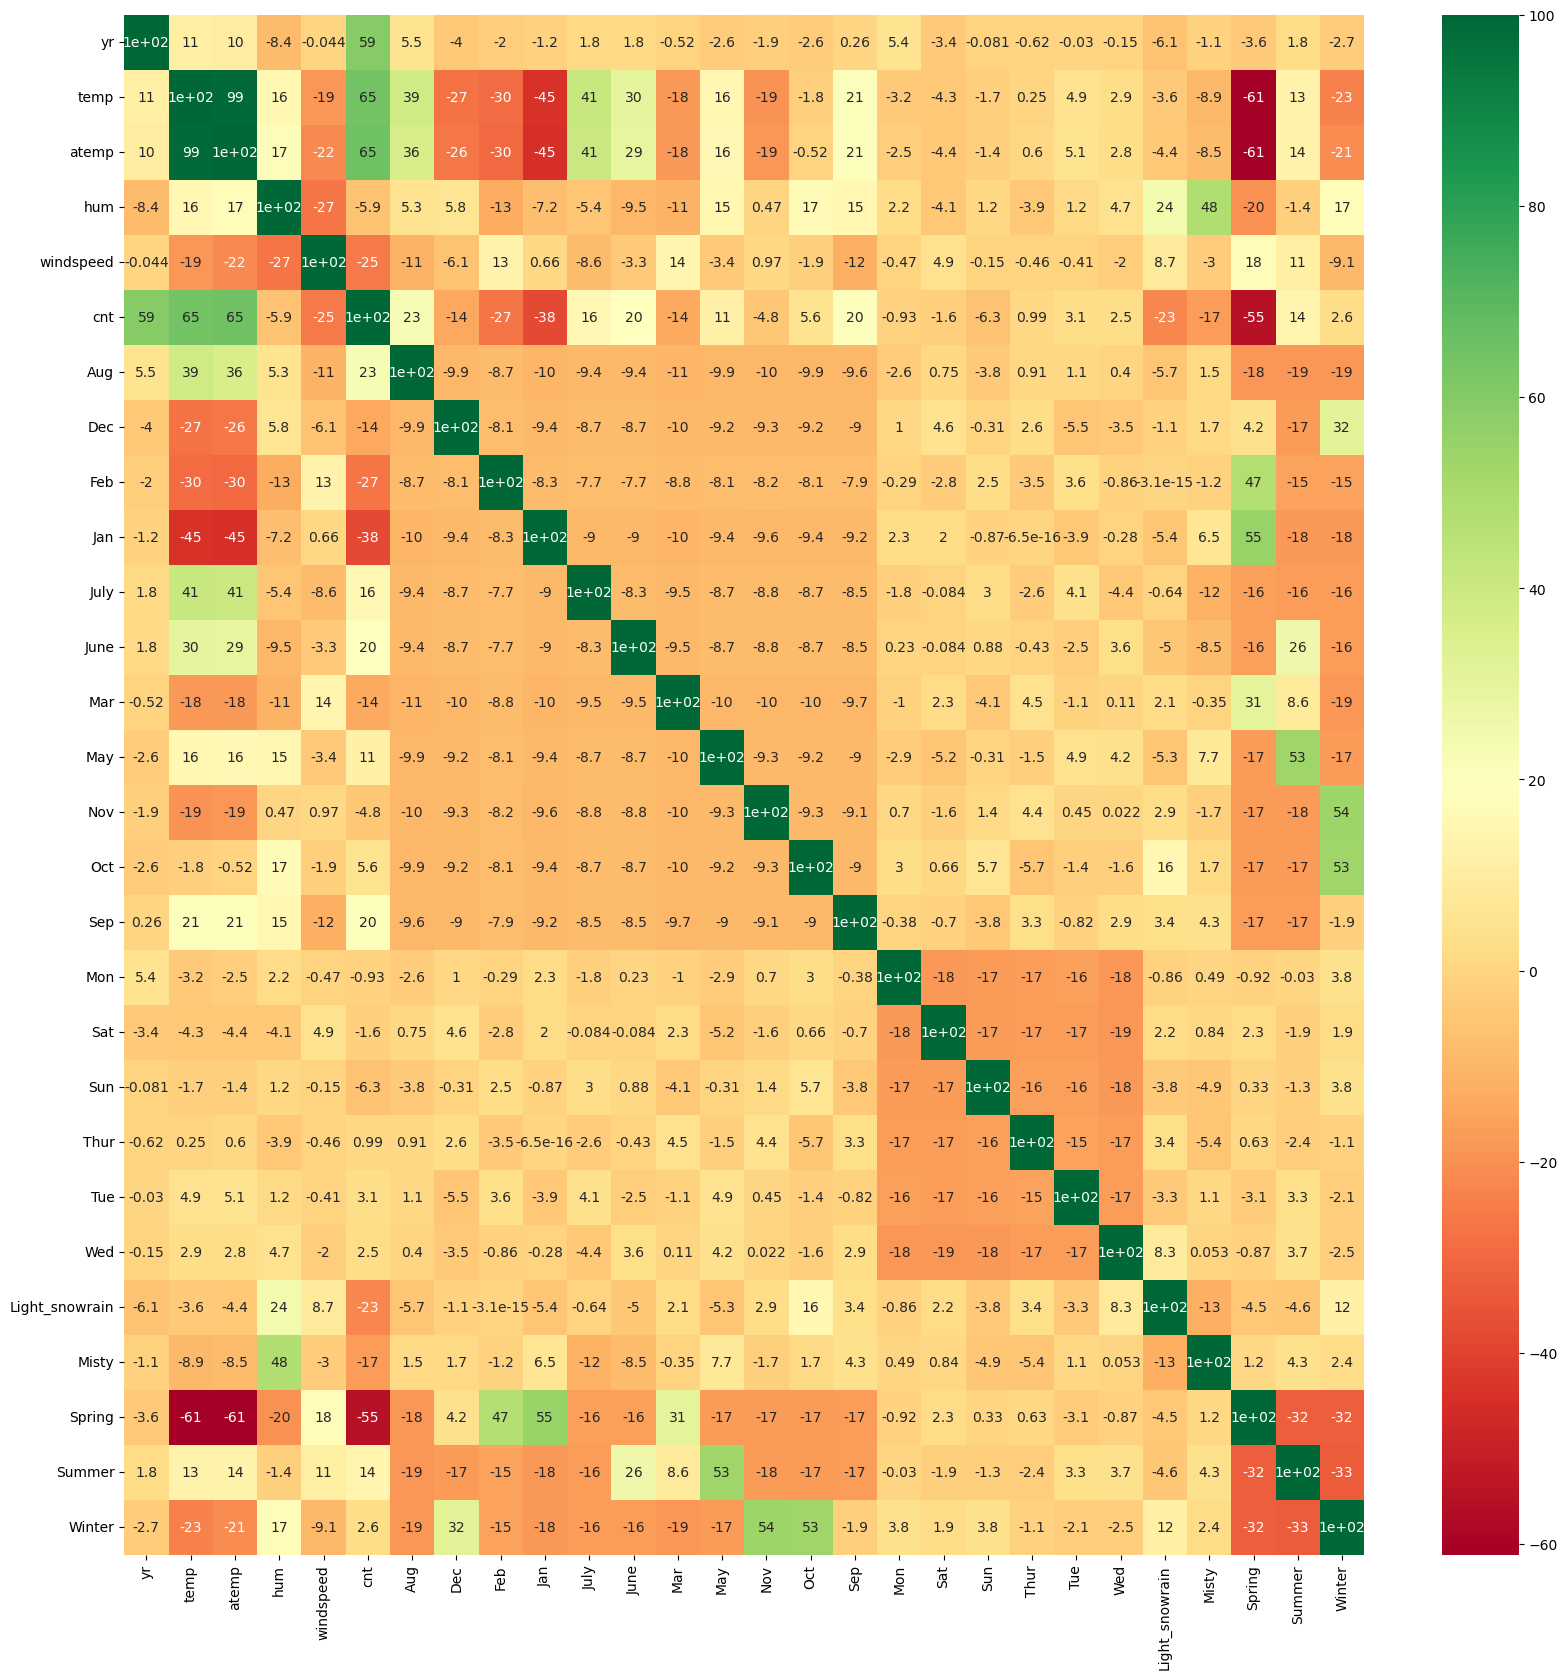

In [673]:
#Plotting correlation on heatmap for better understanding
plt.figure(figsize = (20, 20))
sns.heatmap(((df_train.corr())*100), annot = True, cmap="RdYlGn")
plt.show()

Observations are
1. cnt is correlated with year and temp. 
2. Misty Season and humidity are correlated.
3. Spring season is correlated wwith Jan and Feb
4. Summer season is correlated with may 
5. Winter season is correlated with oct and nov

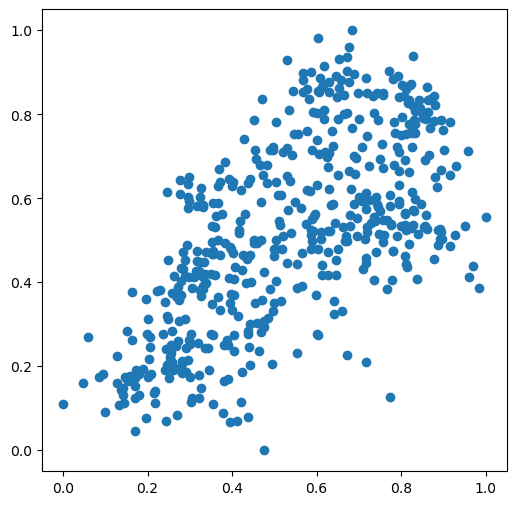

In [674]:
# visualizing temp and cnt correlation
plt.figure(figsize=[6,6])
plt.scatter(df_train.temp, df_train.cnt)
plt.show()

This is similar to what was observed in data visualization step

In [675]:
# Next step is now to build the linear model
X_train_sm = sm.add_constant(X_train)
X_train_sm.head()

,const,instant,dteday,yr,holiday,workingday,temp,atemp,hum,windspeed,...,Sat,Sun,Thur,Tue,Wed,Light_snowrain,Misty,Spring,Summer,Winter
576,1.0,577,31-07-2019,1,0,1,0.815169,33.1448,0.725633,0.264686,...,0,0,0,1,0,0,0,0,0,0
426,1.0,427,03-03-2019,1,0,0,0.442393,20.6746,0.640189,0.255342,...,1,0,0,0,0,0,1,1,0,0
728,1.0,729,30-12-2019,1,0,0,0.245101,11.5850,0.498067,0.663106,...,0,1,0,0,0,0,0,1,0,0
482,1.0,483,28-04-2019,1,0,0,0.395666,18.8752,0.504508,0.188475,...,1,0,0,0,0,0,1,0,1,0
111,1.0,112,22-04-2018,0,0,1,0.345824,16.0977,0.751824,0.380981,...,0,0,0,0,0,0,1,0,1,0


In [677]:
#fitting the model
lr= sm.OLS(y_train,X_train_sm).fit()
#lr_model=lr.fit()
#lr_model.params

ValueError: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data).

In [ ]:
lr_model.summary()